In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import symbols, diff, lambdify,sympify
from tqdm import tqdm

plt.style.use('ggplot')

![](capture.png)

# Defining the objective function and all the needed dervatives
   ## The function dervatives in python and markdown/latex

In [2]:
# function_3 = (1+(x+y+1)^2*(19-14*x+3*x^2-14*y+6*x*y+3*y^2))*(30+(2*x-3*y)^2*(18-32*x+12*x^2+48*y-36*x*y+27*y^2))
# Since my_ID mod 3 = 2. I will go with funtion 3 as per the rules.
np.mod(201693140,3)

2

# setting up the function and the needed dervatives 

In [3]:
x, y = symbols('x y', real=True)
expr = (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

f = lambdify([(x,y)],expr,'numpy')

dfdx  = lambdify([(x,y)],diff(expr,x),'numpy')
dfdy  = lambdify([(x,y)],diff(expr,y),'numpy')

dfdx2 = lambdify([(x,y)],diff(expr,x,x),'numpy')
dfdxy = lambdify([(x,y)],diff(expr,x,y),'numpy')

dfdyx = lambdify([(x,y)],diff(expr,y,x),'numpy')
dfdy2 = lambdify([(x,y)],diff(expr,y,y),'numpy')
 

# The Plotting

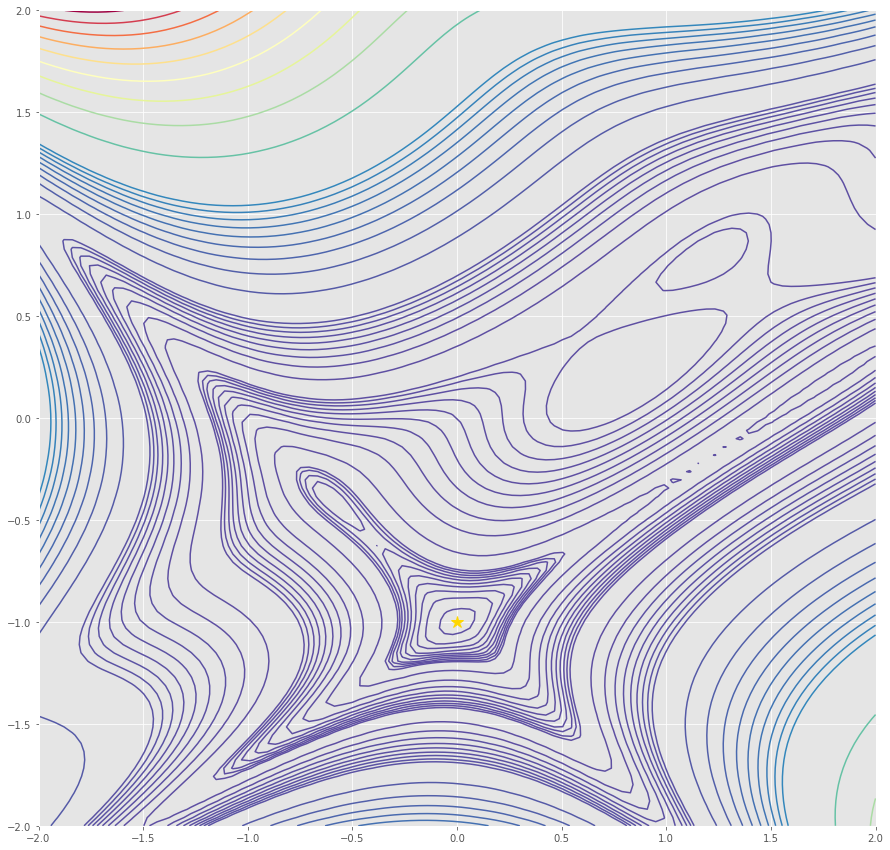

In [4]:
#set fig size
plt.figure(figsize=(15,15))

#define the region, I use (-3,3)X(-3,3) to get a nicer plot.
region_x1 = np.linspace(-2, 2, 100)
region_x2 = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(region_x1, region_x2)

#get the function output to plot
Z = f([X, Y])

#set the contour line level 
levels = (   [5,10,15,20,25,30,35,40,45,50]
            +[100,200,300,400,500,600,700,800,900,1000]
            +[2000,3000,4000,5000,6000,7000,8000,9000,10000]
            +[20000,30000,40000,50000,60000,70000,80000,90000,100000]
            +[200000,300000,400000,500000,600000,700000,800000,900000,1000000]
         )


#set the plot lines color theme and show a legend
#colors=['#808080', '#A0A0A0', '#C0C0C0']
plt.contour(X, Y, Z,levels,cmap=plt.cm.Spectral_r);
#plot the actual minimum point
plt.plot(0,-1,'*',markersize=12,color="gold")
plt.show()


# We wrap the plotting code in a function for reusablilty.

In [20]:
def plot_optim(path=[],name= None ,size= 10):
    """
    Takes a point path and plots the function contour and then plots over it the path
    also highlights the min point as golden star and the last point in the path with red star
    Parameters:
      path - list of the points to plot in order to get the path followed by the algorithm run.
      size - plot figture size with default value of 10
    """
    #set figure size
    plt.figure(figsize=(size,size))
    
    #plot the contour
    levels = (   [5,10,15,20,25,30,35,40,45,50]
            +[100,200,300,400,500,600,700,800,900,1000]
            +[2000,3000,4000,5000,6000,7000,8000,9000,10000]
            +[20000,30000,40000,50000,60000,70000,80000,90000,100000]
            +[200000,300000,400000,500000,600000,700000,800000,900000,1000000]
         )
    plt.contour(X, Y, Z,levels,cmap=plt.cm.Spectral_r,zorder=5);

    #seperate path cord
    path_x = []
    path_y = []

    for i in range(len(path)):
        path_x.append(path[i][0])
        path_y.append(path[i][1])


    plt.scatter(path_x,path_y,zorder=10,color='#FF6A00')  
    plt.plot(path_x,path_y,linewidth=2,zorder=10,color='#FF6A00')  

    #plot the actual minimum point
    plt.plot(0,-1,'*',markersize=15,color="gold",zorder=15)
    if path:
        plt.plot(path[-1][0],path[-1][1],'*',markersize=12,color="red",zorder=15)
    if name:
        plt.title(name)
    #show the plot
    plt.show()
    if path:
        print(f'Best point we got is: {path[-1]} with value = {f(path[-1])}\nFrom Inital Point {path[0]}\nPath lenght = {len(path)}')

# define the Jacobian and Hessian of the function

Let Jacobian of f be

Jacob(x,y):
$\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy}\\
\end{bmatrix}$

Let Hessian  of f be

Hess(x,y):
$\begin{bmatrix}
\frac{df}{dx^2} & \frac{df}{dxdy}\\
\frac{df}{dydx} & \frac{df}{dy^2}
\end{bmatrix}$


In [7]:
def jacob(X):
    return [dfdx(X),dfdy(X)]

def hess(X):
    return [[dfdx2(X),dfdxy(X)],
            [dfdyx(X),dfdy2(X)]]

# Extra funxction to help with Newton Method

In [8]:
def det(M):
    return M[0][0]*M[1][1] - M[0][1]*M[1][0]

def inverse(H):
    deter = det(H)
    a = H[0][0]*(1/deter)
    b = H[0][1]*(1/deter)
    c = H[1][0]*(1/deter)
    d = H[1][1]*(1/deter)
    
    return [[d,-b],[-c,a]]

# Sampels Generation

Using np.random.uniform we sample a sample with 2 dimentions. we do this 10000 times and save the samples generated in a list to get a list of 10000 samples from the region (-2,2)X(-2,2) 

In [9]:
#sample the point into an array
samples = []
for _ in tqdm(range(10_000+1)):
    samples.append(np.random.uniform(-2,2,2).tolist())


100%|█████████████████████████████████████████████████████████████████████████| 10001/10001 [00:00<00:00, 74186.83it/s]


<h1 style="font-size: 50px" >Random Search</h1>

Random search is done by generating point in the the ROI and loop through them, setting the one that returns the minimum   function output as our best sample/chooice

In [10]:
def random_search(samples,f):
    """
    Parameters:
      sample - list of sampled point.
      f - the function to random search through.
    """
    #take the first sample as out best one  
    best_sample = samples[0]
    
    #add it to the path
    search_path = [samples[0]]

    #search loop
    for i in tqdm(range(len(samples)-1)):
        # load the next sample
        next_sample = samples[i]
        
        #compare current best sample with next sample and take the one with minimum function value output
        if f(next_sample,) < f(best_sample,):
            if math.dist(best_sample,next_sample) < 10**-3:
                print("STOP STOP STOP")
                print(math.dist(best_sample,next_sample))
                break
                
            #add the selected point the  path
            search_path.append(next_sample)
            best_sample = next_sample


    #return the search path
    return search_path

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 64908.42it/s]


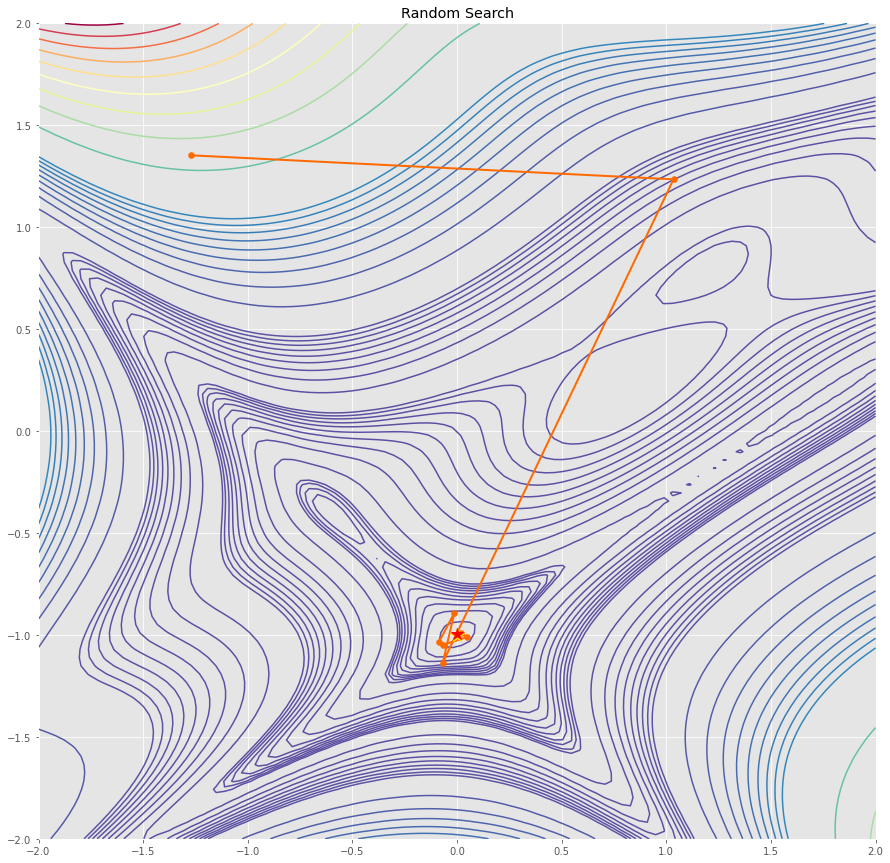

Best point we got is: [-0.0022568161460170266, -0.9960314397819725] with value = 3.009934225216866
From Inital Point [-1.2721014756265108, 1.3529218626462796]
Path lenght = 9


In [13]:
#run the search and get the point path
plot_optim(random_search(samples,f),name="Random Search",size=15)

# Notes:
* Random search is very quick algorithm to run
* In multi-dimentional optimzation problems where d is small. Random search with uniform sampling can be very powerful
    * But if the dimention d is very large then the Random search algorithm becomes very ineffecent since the liklely hood of landing on a global minimum becomes very low and the number of samples needed increases as well 
    
# performance with the goldstein-price function:
Since the algoritm used pre-defined samples point that do not get updated, unlike gradeiant decent and newton method. the function features such as many local minimums around the global min and the unevenness of the surface of the function do not interfer with the algorithm run.

Therefore in theory all that we need to actually get a good guess of the global min is large enough number of sample and good guess of thr region that enclose the global min. And since we have been given the region (-2,2)X(-2,2) we get "decent" resualts but the limit here is the $10^{3}$ sample wchice is not that large of number for this use.

a run with $10^{7}$ samples still does not get us closer to the min than the $10^{3}$ sample run. Therefore in practice Random search in that great for optimzation and have limited uses.

<h1 style="font-size: 50px" >Gradient Decent</h1>

In Gradient Decent we use $grad(f(x))$ to get a vector that points to the greatest increase for a point cord X. then we move our current location point in the oppiste direction.

When using GD we do not follow the change all at once but instead we multiply the gradient with a factor, here a call it the learning rate due to my experance with GS in Deep Learning.

The GD method while great at any dimention d, it is nor garanteded to converge and might get stuck in a local minimum or the gradient might go very very big, we call that in deep learning graiednt explosion.


In [14]:
def GD(X,lr=1e-2,eps=10**-3,append_every=5,time_out=100_000):
    """
    Parameters:
      X   - Starting point.
      lr  - a number multiplyed with the gradient to adject the rate at wiche a point postion is updated
      eps - epslion is the value for the stopping condition
      append_every - value used to append every X point to the path.
      time_out - a limit of iteration to stop infinite run
      Returns:
      path - a list point that the algorithm run has made and followed
    """
    #set the first sample as the initial point on the path
    path = [X]
    #use a counter to check if the GD is stuck bouncing in a reigon
    iterations = 0
    
    #start the loop
    for _ in tqdm(range(time_out)):
       
        #calculate the gradient
        #the gradient might explode, basicly overflows, therefore I use try block to catch the overflow error
        try:
            grad = jacob(X)
            
        except:
            print("Gradient exploded.")
            break
        
        #check that the values of gradeint are not Nan or Inf.
        if np.isnan(grad).any() or np.isinf(grad).any():
            print("Gradient went to Inf or became Nan.")
            break
            
        #calulate the new postion
        new_x = X[0]-(lr*grad[0])
        new_y = X[1]-(lr*grad[1])
        
        #check the stopping condition
        if math.dist(X,[new_x,new_y]) < eps: 
            print("STOP")
            break
        
        #a Time out check if the GD is takeing a lot of iteration to converge.
        if iterations == time_out:
            print("Time out.")
            break
        
        #since the GD might take a lot of steps to converge I use a mod function to add a point evey X iteration.
        if np.mod(iterations,append_every) == 0:
            path.append(X)
         
        #increase the counter and update X
        iterations += 1
        X = [new_x,new_y]

    #retunr the points path 
    return path

  0%|                                                                             | 3/100000 [00:00<00:53, 1886.21it/s]


Gradient exploded.


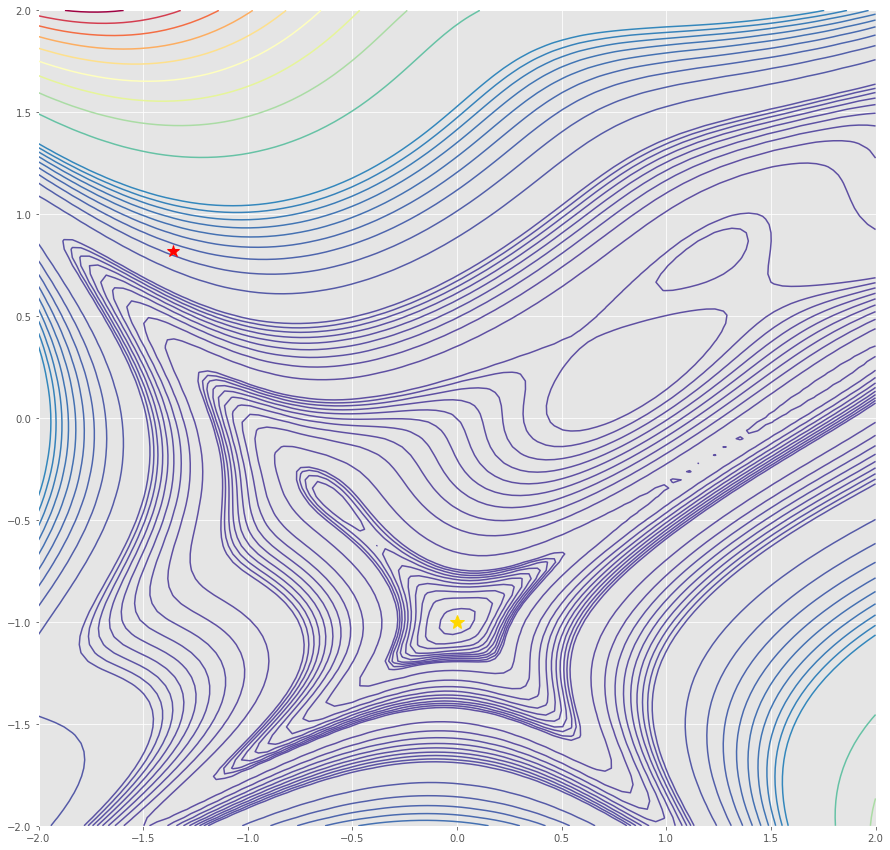

Best point we got is: [-1.3553113980825038, 0.8207657182427188] with value = 33748.3143424466
From Inital Point [-1.3553113980825038, 0.8207657182427188]
Path lenght = 2


In [15]:
plot_optim(GD(samples[1000]),size=15)

# Notes:
Gradient Decent algorithm is well know optimzation algorithm in Mechain learning(ML). since it scales well with dimentionallity
and it is not that hard or expensive to comute the first dervatives of a function

but as we can see from the code checks, Gradeint decent is prone to a lot of problems most notiable when the gradient increase to infinty and also the gradient is not a garanted to converge:

In ML gradient explosion is dealt with using gradient cliping where the grad(f) value is set to a max. e.g         $min(val_{max},grad(f))$ And for the gradient setteling in local minimums, A "momentum" is introduced. Momentum is basiclly the adjusment of the learning rate as the gradient decent algorithm moves along to give the algorithm a better chance to "skip" over local minimum. one optimizor that i have used with such feature is the well-know Adam optimizor.

Here we get another possible problem, as we can observe from the above figures, choocing good stopping condition $\epsilon$ and learning rate $lr$ greatlly affect the algorithm abilly to converge. Gradient Decent with $lr = 10^{-3}$ at $P_{intial}$ might diverge or even explode within 1 or 2 iteration but if we used $lr = 10^{-4}$ at the same point $P_{intial}$ well converge with no problem.

Lastly the gradient decent does not compleltly converge per sa put gets very close the minimum and settles near it. The problem is that the gradent might also get near but so near to trigger the stoping condition thus the algorithm get stuck bouncing around for ever less stopped. In the code I put an iteration time out and in ML the model training using gradent decent is done in rounds called epoches with extra optimzations like the prevously mentioned momentom but also with early stopping checks being used as well.



<h1 style="font-size: 50px" >Newton Method</h1>

Newton Medthod for muli-dimentional function is the generilzation of the well know Newton Method for d diemntion where d > 1.

The standered equation fo NM is $x_{i+1} = x_i - \frac{f}{f'}$
for optimzation instead of $\frac{f}{f'}$ we use the first and seconde dervatives of f $\frac{f'}{f''}$
but since we will you two variable function the dervative of a function $f(x,y)$ is actually a vector/matrix of the partial dervatives of function with recpect every to ever variable.
for example
$f'(x,y) = \begin {bmatrix} \frac{df}{dx},\frac{df}{dy} \end{bmatrix}$ 
and
$f''(x,y) = \begin {bmatrix}
                \frac{df}{dx^2} & \frac{df}{dxdy}\\
                \frac{df}{dydx} & \frac{df}{dy^2}
                \end{bmatrix}$
                
but we subbing back $f'(x,y)$ and $f''(x,y)$ in $x_{i+1} = x_i - \frac{f}{f'}$ we get a problem the divistion of a matrix is undefined but we have what is called 'Inverstion'

rewriting NM with matrix inverstion we get $x_{i+1} = x_i - (f''^{-1})(f')$ where $f''^{-1}$ is the inverse of $f''$.

Here $f'$ is called the Jacobian of $f$ and $f''$ is know as the Hessian of $f$.


In [16]:
def nm(X,time_out=50000):
    
    #set the first sample as the initial point on the pat
    path = [X]
    #use a counter to check if the NM is stuck
    iterations = 0
    
    #start the loop
    for _ in tqdm(range(time_out)):
        
        #calculate the inverse Hessian and Jacobian of f at X
        inv_hess = inverse(hess(X))
        jac = jacob(X)
        
        # calculate the next step according to the above formula 
        step_x = X[0] - (inv_hess[0][0]*jac[0] + inv_hess[0][1]*jac[1])
        step_y = X[1] - (inv_hess[1][0]*jac[0] + inv_hess[1][1]*jac[1])
        
        #check the stopping condition
        if math.dist(X,[step_x,step_y]) < 10**-3: 
            print("STOP STOP STOP")
            break
        
        #a Time out check if NM is takeing a lot of iteration to converge.
        if iterations == time_out:
            print("Time out F")
            break
        
        #append X in the path
        path.append(X)
            
        #increase the counter and update X
        iterations += 1
        X = [step_x,step_y]
    
    #return the search path
    return path

In [17]:
samples[10]

[-0.46186516782429665, -0.27306241101596695]

  0%|                                                                              | 4/50000 [00:00<00:09, 5434.80it/s]


STOP STOP STOP


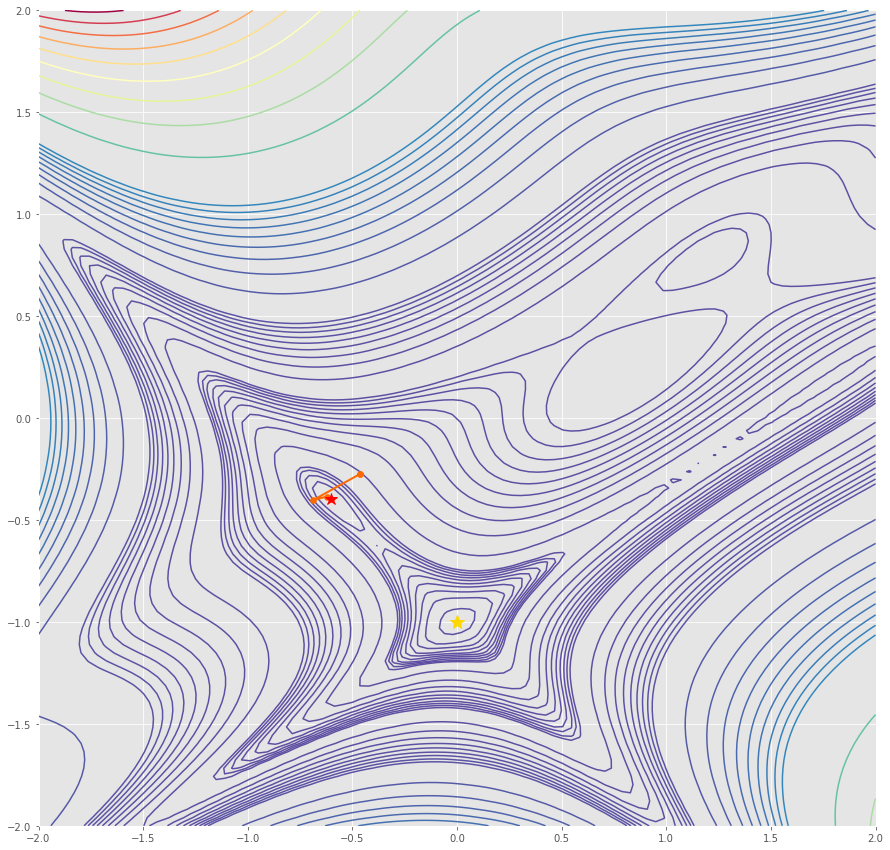

Best point we got is: [-0.6020158797143202, -0.3981139065896016] with value = 30.001722922303944
From Inital Point [-0.46186516782429665, -0.27306241101596695]
Path lenght = 5


In [21]:
plot_optim(nm(samples[10]),size=15)

  0%|                                                                              | 4/50000 [00:00<00:24, 2000.62it/s]


STOP STOP STOP


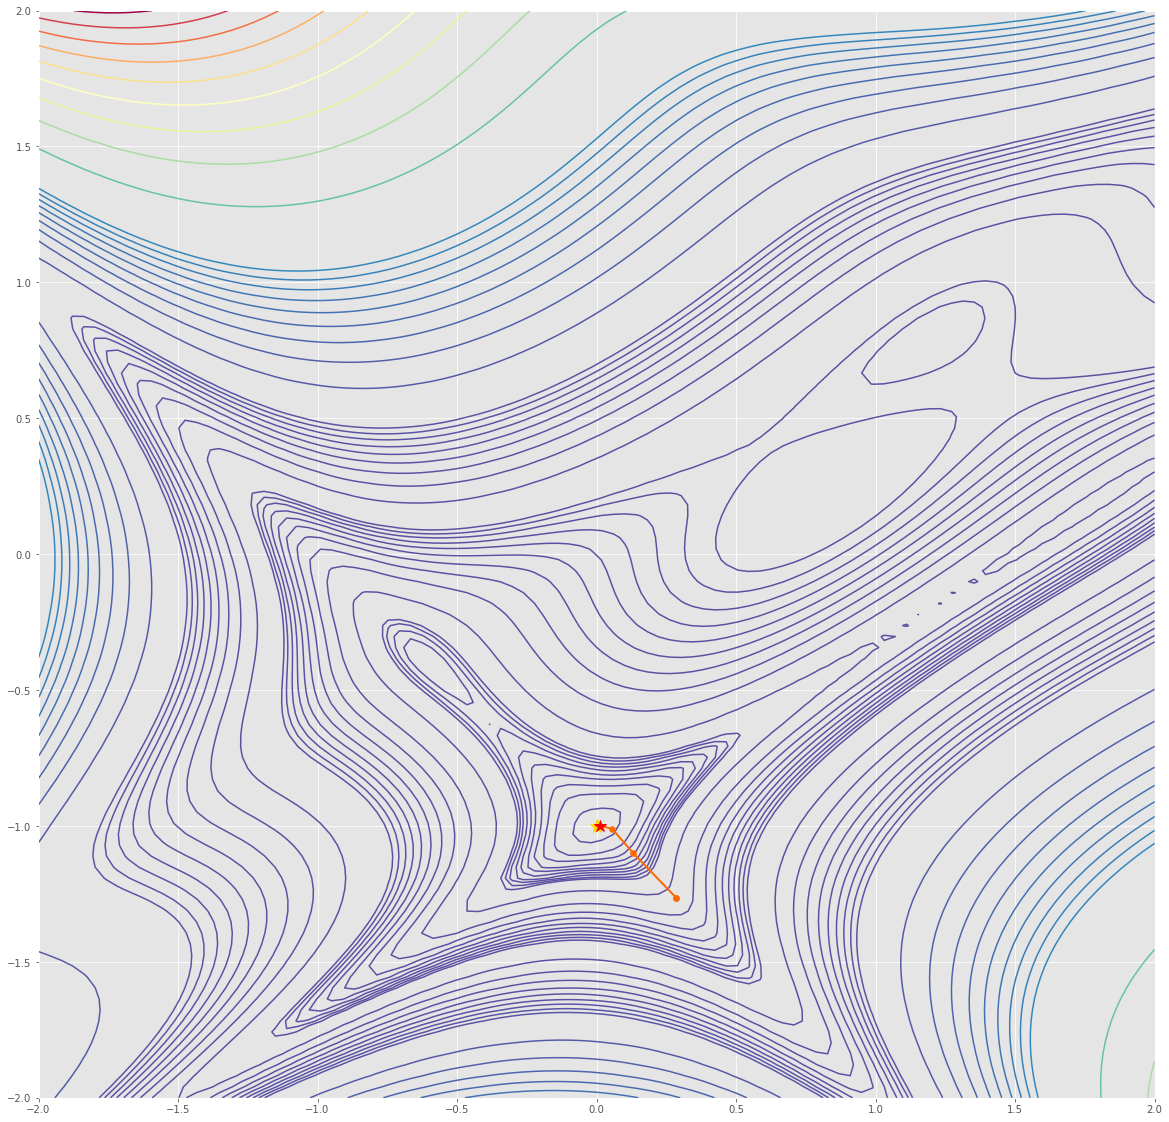

Best point we got is: [0.013738438426986951, -0.9992811457156493] with value = 3.045973390867783
From Inital Point [0.28561292030379803, -1.2642814343501918]
Path lenght = 5


In [22]:
plot_optim(nm([0.28561292030379803, -1.2642814343501918]),size=20)

  0%|                                                                             | 20/50000 [00:00<00:07, 6508.85it/s]


STOP STOP STOP


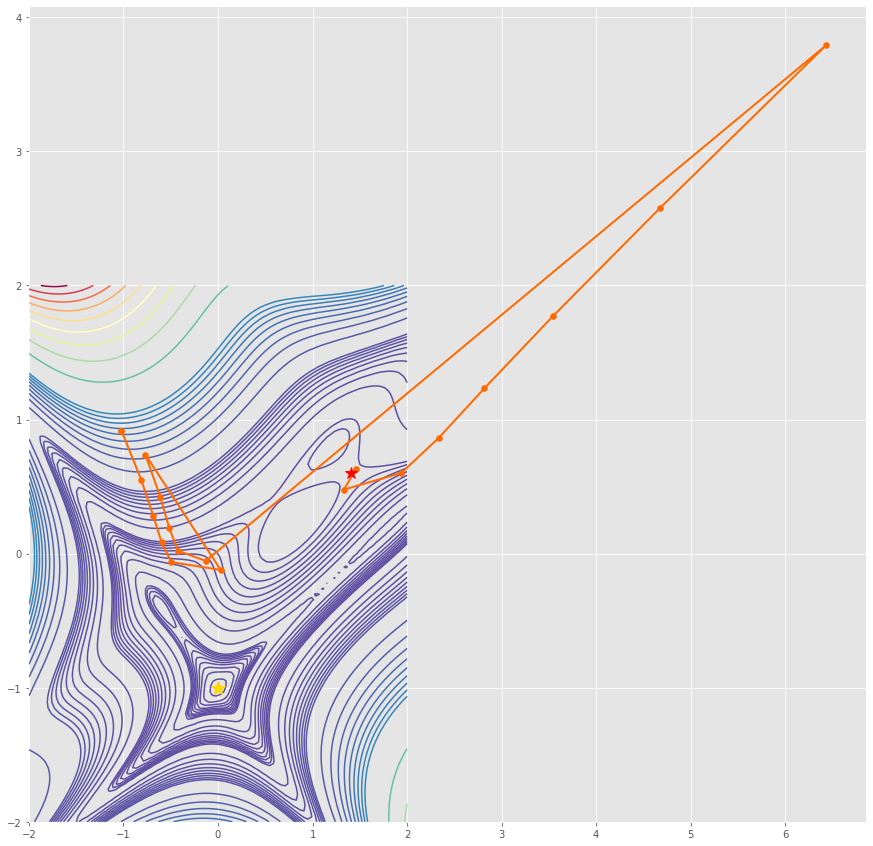

Best point we got is: [1.4057655199029926, 0.6036717447490759] with value = 980.056491135865
From Inital Point [-1.0221998940997787, 0.9182336996913398]
Path lenght = 21


In [23]:
plot_optim(nm(samples[1441]),size=15)

### save point that work:
* [-0.7895897909712257, -1.6708266164171652] this point is very nice to demonstrate NM
* [0.28561292030379803, -1.2642814343501918]
